In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

## Formal Definition of a Limit

In mathematics — especially in **Analysis** — precision is essential. To fully and rigorously define the concept of a limit, we must go beyond intuition and introduce a formal logical framework. This leads us to the **Delta-Epsilon** definition of a limit.

### The Delta-Epsilon Definition

Let $f(x)$ be defined on an open interval about $c$, except possibly at $c$ itself. We say that the limit of $f(x)$ as $x$ approaches $c$ is the number $L$, and write

$$
\lim_{x \to c} f(x) = L
$$

if, for every number $\epsilon > 0$, there exists a corresponding number $\delta > 0$ such that

$|f(x) - L| < \epsilon \quad \text{whenever} \quad 0 < |x - c| < \delta$.

---

The **Delta-Epsilon** definition is a more precise way to define limits, moving past the informal ideas of "getting closer and closer" to a value. This formal framework is essential for proving theorems in advanced mathematics.

*example*
$$\lim_{x \to 3}(2x-1) = 5$$

#### 1. Function Definition

In [8]:
def f(x):
    return 2*x - 1

#### 2. Key Parameters

In [9]:
x0 = 3          # Point of interest
L = f(x0)       # Limit value = 5
epsilon = 1.5   # Tolerance around L
delta = epsilon / 2  # Tolerance around x0 = 0.75

#### 3. Colored Regions

##### Red Shaded Area (ε-band)
- **Horizontal band** between y = L - ε and y = L + ε
- Range: y ∈ [3.5, 6.5]
- Represents acceptable values of f(x) within ε tolerance

##### Green Shaded Area (δ-band)  
- **Vertical band** between x = x₀ - δ and x = x₀ + δ
- Range: x ∈ [2.25, 3.75]
- Represents acceptable values of x within δ tolerance

##### Yellow Shaded Area (Valid Region)
- **Intersection** of red and green bands
- Shows the region where both conditions are satisfied
- Proves that when x is within δ of x₀, f(x) is within ε of L

#### 4. Key Visual Elements

##### Points
- **Black dot (3, 5)**: The limit point (x₀, L)
- **Red dot (0, 0)**: Origin for reference

##### Lines
- **Blue solid line**: The function f(x) = 2x - 1
- **Red dashed lines**: ε boundaries at y = 3.5 and y = 6.5
- **Green dashed lines**: δ boundaries at x = 2.25 and x = 3.75
- **Gray lines**: Reference axes through the limit point
  
##### Customization Options
- **Change ε value**: Modify `epsilon = 1.5` to see different tolerance levels
- **Adjust δ calculation**: Currently δ = ε/2, but you can use different relationships
- **Modify function**: Change `def f(x)` to visualize other functions
- **Adjust plot range**: Modify `xlim()` and `ylim()` for different viewing windows

#### Mathematical Verification
For $f(x) = 2x - 1$ with $\epsilon = 1.5$:

1. **Given**: $|x - 3| < \delta = 0.75$
2. **Then**: 
   $
   |f(x) - 5| = |(2x - 1) - 5| = |2x - 6| = 2|x - 3|
   $
3. **Since** $|x - 3| < 0.75$, we have:
   $
   2|x - 3| < 2(0.75) = 1.5 = \epsilon
   $
4. **Therefore**: $|f(x) - 5| < \epsilon$ ✓

This confirms that for every $\epsilon > 0$, we can find $\delta = \frac{\epsilon}{2}$ such that  
if $0 < |x - 3| < \delta$, then $|f(x) - 5| < \epsilon$.

**Thus, by the Delta-Epsilon definition of a limit**:
$
\lim_{x \to 3} (2x - 1) = 5 \quad \blacksquare
$



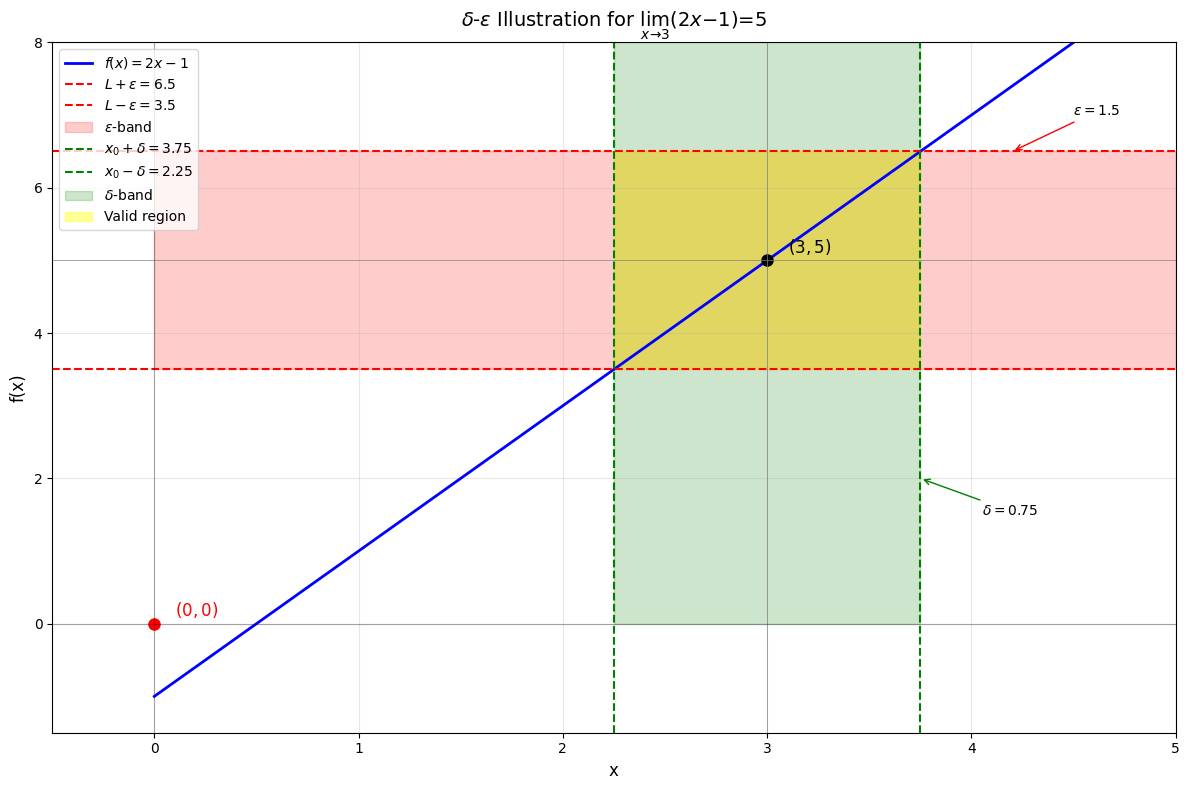

In [10]:
# Range of x
x = np.linspace(0, 5, 400)
y = f(x)

# Plot setup
plt.figure(figsize=(12, 8))
plt.plot(x, y, label=r'$f(x) = 2x - 1$', color='blue', linewidth=2)

# Horizontal ε-band
plt.axhline(L + epsilon, color='red', linestyle='--', label=fr'$L + \epsilon = {L + epsilon}$')
plt.axhline(L - epsilon, color='red', linestyle='--', label=fr'$L - \epsilon = {L - epsilon}$')
plt.fill_between(x, L - epsilon, L + epsilon, color='red', alpha=0.2, label=r'$\epsilon$-band')

# Vertical δ-band
y_fill = np.linspace(0, 8, 100)
plt.axvline(x0 + delta, color='green', linestyle='--', label=fr'$x_0 + \delta = {x0 + delta}$')
plt.axvline(x0 - delta, color='green', linestyle='--', label=fr'$x_0 - \delta = {x0 - delta}$')
plt.fill_betweenx(y_fill, x0 - delta, x0 + delta, color='green', alpha=0.2, label=r'$\delta$-band')

# Intersection (valid region)
x_inter = np.linspace(x0 - delta, x0 + delta, 100)
plt.fill_between(x_inter, L - epsilon, L + epsilon, color='yellow', alpha=0.4, label='Valid region')

# Key points
plt.plot(x0, L, 'ko', markersize=8)
plt.text(x0 + 0.1, L + 0.1, r'$(3, 5)$', fontsize=12)

plt.plot(0, 0, 'ro', markersize=8)
plt.text(0.1, 0.1, r'$(0, 0)$', fontsize=12, color='red')

# Axes and grid
plt.axhline(L, color='gray', linewidth=0.5)
plt.axvline(x0, color='gray', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.8, alpha=0.3)
plt.axvline(0, color='black', linewidth=0.8, alpha=0.3)

# Annotations
plt.annotate(r'$\epsilon = 1.5$', xy=(4.2, L + epsilon), xytext=(4.5, L + epsilon + 0.5),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10)

plt.annotate(r'$\delta = 0.75$', xy=(x0 + delta, 2), xytext=(x0 + delta + 0.3, 1.5),
             arrowprops=dict(arrowstyle='->', color='green'), fontsize=10)

# Labels and layout
plt.title(r'$\delta$-$\epsilon$ Illustration for $\lim_{x \to 3}(2x - 1) = 5$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.xlim(-0.5, 5)
plt.ylim(-1.5, 8)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()